# Homework 4: Statistics

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW04.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

For questions that ask you to make an interpretation, please write a sentence or two explaining your response. You can use "Markdown" language to create a cell (like this one) which is ordinary text instead of using code. To do this, create a new cell, and then look at the bar above which has a picture of a floppy disk. On the right side is a drop down menu that allows you change whether a cell is "Markdown" or "Code".

**The homework should be submitted to Gradescope (.pdf file). Please label it by your student ID number (SIS ID)**

## Problem 1: Central Limit Theorem

Here we will verify the Central Limit Theorem and reproduced a plot I showed in class (https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:Dice_sum_central_limit_theorem.svg)

1. Write a function that returns $n$ integer random numbers, uniformly disributed between 1 and 6, inclusively. This represents $n$ throws of a fair 6-sided die. The value that comes up at each throw will be called the "score".
1. Generate a distribution of 100 dice throws and plot it as a  histogram normalized to unit area. Compute the mean $\mu_1$ and standard deviation $\sigma_1$ of this distribution. Compare your numerical result to the analytical calculation. 
1. Generate 10,000 sets of throws of $N=2,3,4,5,10$ dice, computing the total sum of dice scores for each set. For each value of $N$, plot the distribution of total scores, and compute the mean $\mu_N$ and standard deviation $\sigma_N$ of each distribution. This should be similar to the plot at the link above.
1. Plot the standard deviation $\sigma_N$ as a function of $N$. Does it follow the Central Limit Theorem? 

Numerical result: μ1 = 3.64000
Numerical result: σ1 = 1.66445
Analytical calculation: μ = 3.5
Analytical calculation: σ = 1.70783
μ2 = 6.97410
σ2 = 2.42924
μ3 = 10.50890
σ3 = 2.94848
μ4 = 13.94360
σ4 = 3.42103
μ5 = 17.53720
σ5 = 3.85863
μ10 = 34.97970
σ10 = 5.39133
It follows the Central Limit Theorem.


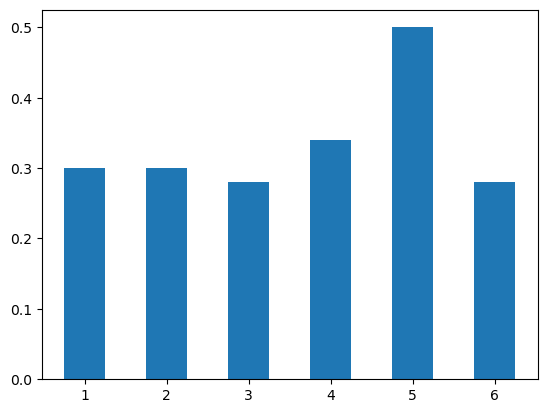

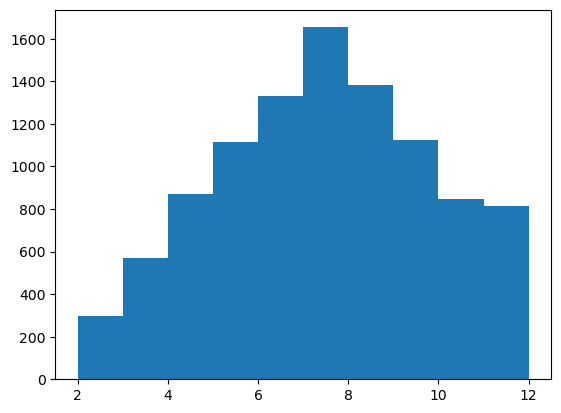

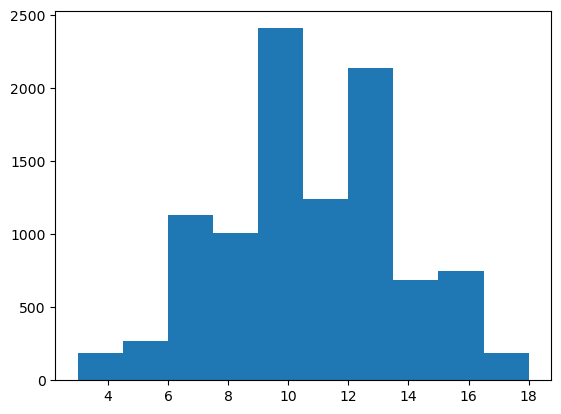

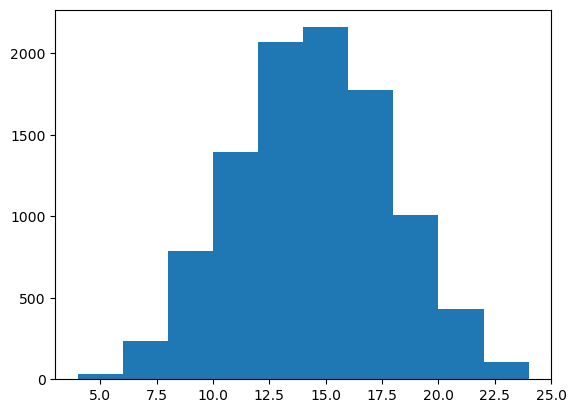

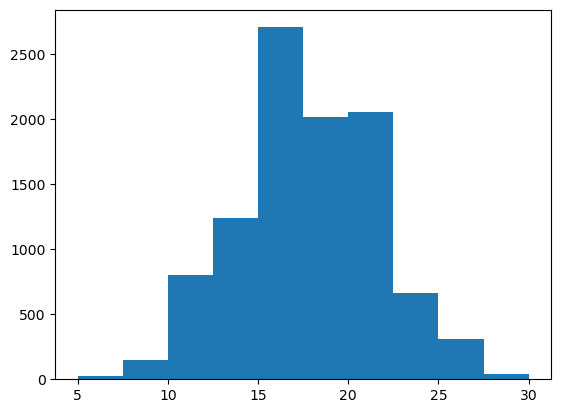

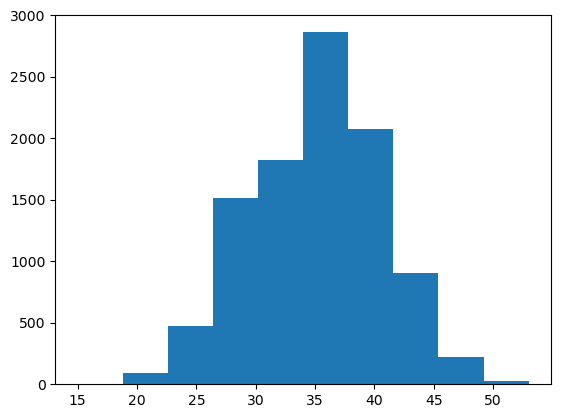

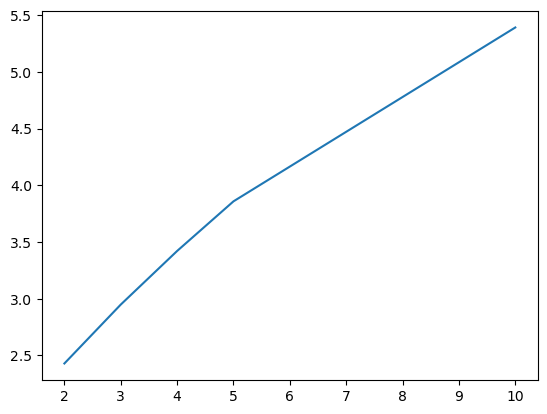

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def throw_dice(n):
    return np.array([np.random.randint(1, 7) for i in range(n)])

throws = throw_dice(100)
plt.figure()
plt.hist(throws, bins=np.arange(0.75, 6.5, 0.5), density=True)
print('Numerical result: μ1 = %.5f' % np.mean(throws))
print('Numerical result: σ1 = %.5f' % np.std(throws))
print('Analytical calculation: μ = 3.5')
print('Analytical calculation: σ = 1.70783')

sigmas = []
for i in range(2, 6):
    totals = [np.sum(throw_dice(i)) for j in range(10000)]
    plt.figure()
    plt.hist(totals)
    print('μ%d = %.5f' % (i, np.mean(totals)))
    sigma = np.std(totals)
    print('σ%d = %.5f' % (i, sigma))
    sigmas.append(sigma)
totals = [np.sum(throw_dice(10)) for j in range(10000)]
plt.figure()
plt.hist(totals)
print('μ10 = %.5f' % np.mean(totals))
sigma = np.std(totals)
print('σ10 = %.5f' % sigma)
sigmas.append(sigma)

plt.figure()
plt.plot([2, 3, 4, 5, 10], sigmas)
print('It follows the Central Limit Theorem.')

## Problem 2: Parity-violating asymmetry

The data sample for this problem comes from the <a href="http://www.slac.stanford.edu/exp/e158">E158</a> experiment at SLAC (a national lab near that Junior university across the Bay). E158 measured a parity-violating asymmetry in Møller (electron-electron) scattering. This was a fixed-target experiment, which scattered longitudinally-polarized electrons off atomic (unpolarized) electrons in the 1.5m liquid hydrogen target. The data below contains a snapshot of 10,000 "events" from this experiment (overall, the experiment collected almost 400 million such events over the course of about 4 months). Each event actually records a pair of pulses: one for the right-handed electron (spin pointing along momentum) and one for the left-handed electron. For each event, we record 4 variables:

* Counter: event index
* Asymmetry: "raw" cross section asymmetry $A_{raw}$ from one of the detector channels (there are 50 of these overall). The cross section asymmetry is defined as 
$A_{raw} = \frac{\sigma_R-\sigma_L}{\sigma_R+\sigma_L}$
The asymmetry is recorded in units of PPM (parts per million). It is called "raw" because corrections due to the difference in beam properties at the target are not yet applied.
* DeltaX: difference in beam position $\Delta X=X_R-X_L$ at the target in X direction in microns (with the convention that the beam is traveling along Z)
* DeltaY: difference in beam position $\Delta Y=Y_R-Y_L$ at the target in Y direction in microns

The data sample is provided in plain text format as the file <tt>asymdata.txt</tt>. Questions for this analysis:

1. Read the data from the file, and plot distributions of $A_{raw}$, $\Delta X$, and $\Delta Y$. 
1. Compute the mean of the raw asymmetry distribution and its statistical uncertainty.
1. Compute the standard deviation of the raw asymmetry distribution and its statistical uncertainty.
1. Compute the fraction of events contained within $\pm 1\sigma$ of the mean, $\pm 2\sigma$ of the mean, and $\pm 3\sigma$ of the mean (where $\sigma$ is the standard deviation you computed in Part 3). Compare these fractions with the quantiles of the Gaussian distribution (see lecture notes) ? 
1. Plot $A_{raw}$ vs $\Delta X$, $A_{raw}$ vs $\Delta Y$, and $\Delta X$ vs $\Delta Y$ as scatter plots. 
1. Compute the correlation coefficients <tt>Corr(Asym,DeltaX)</tt>, <tt>Corr(Asym,DeltaY)</tt>, and <tt>Corr(DeltaX,DeltaY)</tt>. See lecture notes, Workshop04.ipynb, Workshop05_optional.ipynb, or https://en.wikipedia.org/wiki/Pearson_correlation_coefficient for additional help understanding correlation coefficients. Which variables are approximately independent of each other ?

mean = 0.44301, statistical uncertainty = 8.48853
std = 848.85333, statistical uncertainty = 6.00260
fraction of events contained within ±1σ = 0.68540
fraction of events contained within ±2σ = 0.95550
fraction of events contained within ±3σ = 0.99740
In standard Gaussian distribution:
fraction of events contained within ±1σ = 0.68010
fraction of events contained within ±2σ = 0.95610
fraction of events contained within ±3σ = 0.99730
Corr(Asym, DeltaX) = 0.05639
Corr(Asym, DeltaY) = 0.64754
Corr(DeltaX, DeltaY) = 0.40213
Asym and DeltaX are approximately independent of each other.


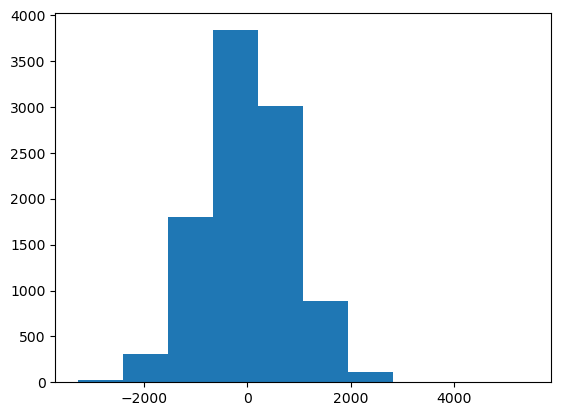

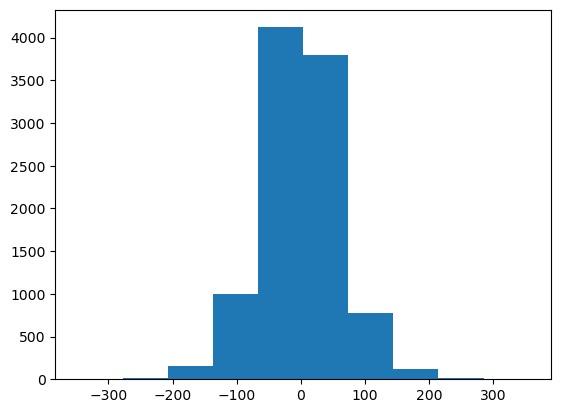

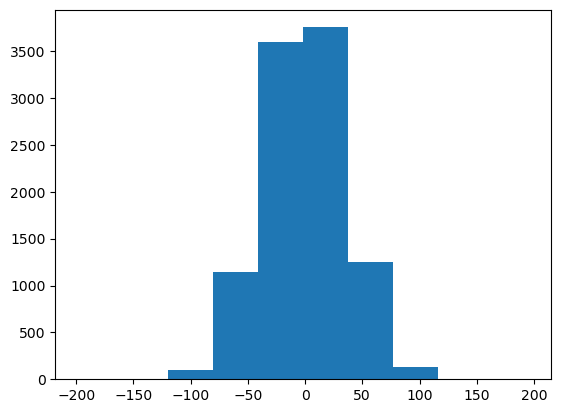

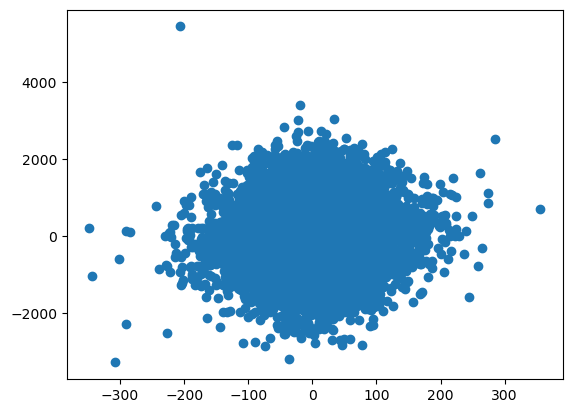

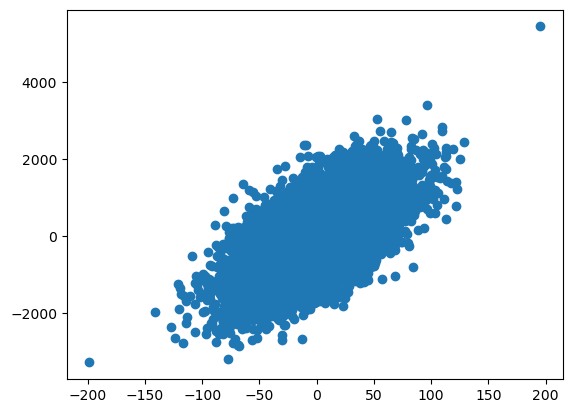

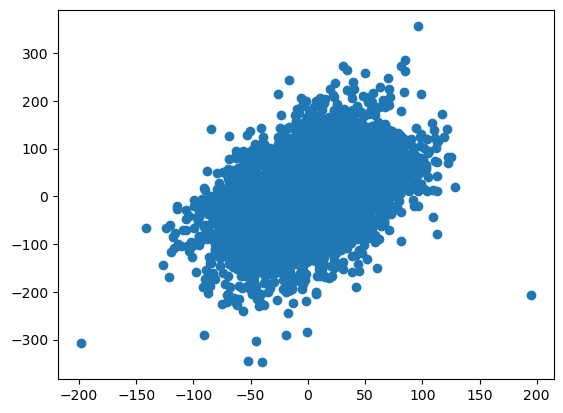

In [2]:
f = open('asymdata.txt')

a_raw = []
delta_x = []
delta_y = []
f.readline()
for line in f:
    tokens = line.split()
    a_raw.append(float(tokens[1]))
    delta_x.append(float(tokens[2]))
    delta_y.append(float(tokens[3]))

plt.figure()
plt.hist(a_raw)

plt.figure()
plt.hist(delta_x)

plt.figure()
plt.hist(delta_y)

mean_a_raw = np.mean(a_raw)
std_a_raw = np.std(a_raw)
size = len(a_raw)
print('mean = %.5f, statistical uncertainty = %.5f' % (mean_a_raw, std_a_raw / np.sqrt(size)))
print('std = %.5f, statistical uncertainty = %.5f' % (std_a_raw, std_a_raw / np.sqrt(2 * size - 2)))

num1 = 0
num2 = 0
num3 = 0
for a in a_raw:
    if mean_a_raw - 3 * std_a_raw <= a and a <= mean_a_raw + 3 * std_a_raw:
        num3 += 1
        if mean_a_raw - 2 * std_a_raw <= a and a <= mean_a_raw + 2 * std_a_raw:
            num2 += 1
            if mean_a_raw - std_a_raw <= a and a <= mean_a_raw + std_a_raw:
                num1 += 1
print('fraction of events contained within ±1σ = %.5f' % (num1 / size))
print('fraction of events contained within ±2σ = %.5f' % (num2 / size))
print('fraction of events contained within ±3σ = %.5f' % (num3 / size))

xs = np.random.normal(size=10000)
num1 = 0
num2 = 0
num3 = 0
for x in xs:
    a = abs(x)
    if a < 3:
        num3 += 1
        if a < 2:
            num2 += 1
            if a < 1:
                num1 += 1
print('In standard Gaussian distribution:')
print('fraction of events contained within ±1σ = %.5f' % (num1 / 10000))
print('fraction of events contained within ±2σ = %.5f' % (num2 / 10000))
print('fraction of events contained within ±3σ = %.5f' % (num3 / 10000))

plt.figure()
plt.scatter(delta_x, a_raw)

plt.figure()
plt.scatter(delta_y, a_raw)

plt.figure()
plt.scatter(delta_y, delta_x)

print('Corr(Asym, DeltaX) = %.5f' % np.corrcoef(a_raw, delta_x)[0][-1])
print('Corr(Asym, DeltaY) = %.5f' % np.corrcoef(a_raw, delta_y)[0][-1])
print('Corr(DeltaX, DeltaY) = %.5f' % np.corrcoef(delta_x, delta_y)[0][-1])
print('Asym and DeltaX are approximately independent of each other.')

## Problem 3: Gamma-ray peak

[Some of you may recognize this problem from Advanced Lab's Error Analysis Exercise. That's not an accident. You may also recognize this dataset in Homework05. That's not an accident either.]

You are given a dataset (`peak.dat`) from a gamma-ray experiment consisting of ~1000 events. Each line in the file corresponds to one recorded gamma-ray event, and stores the the measured energy of the gamma-ray (in MeV). We will assume that the energies are randomly distributed about a common mean, and that each event is uncorrelated to others. Read the dataset from the enclosed file and:
1. Produce a histogram of the distribution of energies. Choose the number of bins wisely, i.e. so that the width of each bin is smaller than the width of the peak, and at the same time so that the number of entries in the most populated bin is relatively large. Since this plot represents randomly-collected data, plotting error bars would be appropriate.
1. Compute the mean and standard deviation of the distribution of energies and their statistical uncertainties. Assume the distribution is Gaussian and see the lecture notes for the formulas for the mean and variance of the sample and the formulas for the errors on these quantities. 
1. Fit the distribution to a Gaussian function using an unbinned fit (<i>Hint:</i> use <tt>scipi.stats.norm.fit()</tt> function), and compare the parameters of the fitted Gaussian with the mean and standard deviation computed in Part 2


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize as fitter


# Once again, feel free to play around with the matplotlib parameters
plt.rcParams['figure.figsize'] = 8,4
plt.rcParams['font.size'] = 14


energies = np.loadtxt('peak.dat') # MeV

Recall `plt.hist()` isn't great when you need error bars, so it's better to first use [`np.histogram()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) -- which returns the counts in each bin, along with the edges of the bins (there are $n + 1$ edges for $n$ bins).  Once you find the bin centers and errors on the counts, you can make the actual plot with [`plt.bar()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html).  Start with something close to `bins = 25` as the second input parameter to `np.histogram()`.

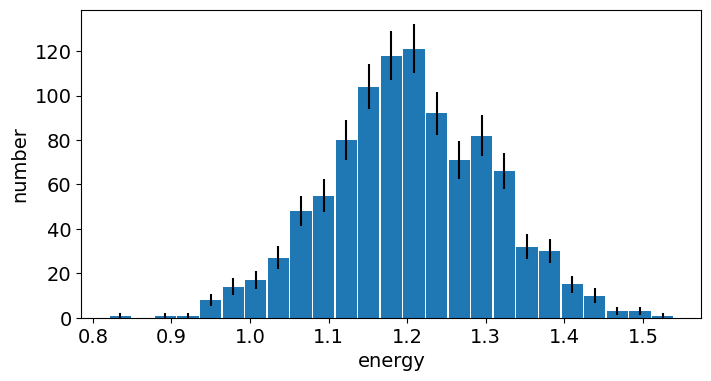

In [4]:
# use numpy.histogram to get the counts and bin edges
counts, bin_edges = np.histogram(energies, bins=25)
# bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1]) works for finding the bin centers
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
# assume Poisson errors on the counts – errors go as the square root of the count
errors = np.sqrt(counts)
# now use plt.bar() to make the histogram with error bars (remember to label the plot)
plt.figure()
plt.bar(bin_centers, counts, width = 0.027, yerr=errors)
plt.xlabel('energy')
plt.ylabel('number')
pass

In [5]:
# Compute the mean and standard deviation of the list of `energies` and their uncertainties
std_energy = np.std(energies)
size = len(energies)
print('mean = %.5f, uncertainty = %.5f' % (np.mean(energies), std_energy / np.sqrt(size)))
print('standard deviation = %.5f, uncertainty = %.5f' % (std_energy, std_energy / np.sqrt(2 * size - 2)))

mean = 1.20268, uncertainty = 0.00328
standard deviation = 0.10379, uncertainty = 0.00232


You can use the list of `energies` directly as input to `scipy.stats.norm.fit()`; the returned values are the mean and standard deviation of a fit to the data.

In [6]:
# Find the mean and standard deviation using scipy.stats.norm.fit()
# Compare these to those computed in the previous cell
mean, std = scipy.stats.norm.fit(energies)
print('mean = %.5f' % mean)
print('standard deviation = %.5f' % std)

mean = 1.20268
standard deviation = 0.10379
